In [1]:

import pandas as pd
import matplotlib.pyplot as plt



# Multi-Page Web Scraping Project: Countries and Capitals Analysis

This project scrapes data from Wikipedia to gather information about countries and their capitals, then visits each page to extract additional details such as languages spoken and population. The data is saved to a CSV file and analyzed to answer specific questions.

### Project Requirements and Details

- **Website Selected**: Wikipedia
- **Primary URL**: https://en.wikipedia.org/wiki/List_of_national_capitals
- **robots.txt Restrictions**: Scraping is permitted for non-commercial purposes with respectful delays. [Review Wikipedia's robots.txt here](https://en.wikipedia.org/robots.txt).

### Questions to Explore

The following questions were designed to provide meaningful insights from the dataset:
1. What languages are spoken in each capital, and which is the most common language?
2. Which five capitals have the highest populations?
3. Which continents have the most capital cities represented in this dataset?
4. What is the average population of capitals by continent?
5. Which capitals have populations over a specific threshold (e.g., over 5 million)?

**Note**: The final analysis will select four questions, with at least two using plots to display the data visually.

### Steps in this Notebook:
1. **Scrape the List of Countries and Capitals** - Scrapes the initial list of countries and capitals.
2. **Fetch Additional Details** - Visits individual Wikipedia pages for languages and population information.
3. **Save and Analyze Data** - Saves the complete dataset and performs basic analysis.

Let's begin!



# Analysis Questions

1. **How many countries are listed in total?**
   - *This question provides an overview of the dataset size, helping to understand the scope of the countries and capitals represented.*

2. **Which continent has the most countries with listed capitals?**
   - *This analysis can reveal regional distributions and help to identify which continents have the most representation in this dataset.*

3. **What is the average population of capitals grouped by continent?**
   - *Analyzing average populations by continent can reveal how urbanization patterns differ across regions.*

4. **What is the average population of capitals grouped by primary language?**
   - *Grouping by language allows us to explore population patterns across linguistic regions, offering insights into the cultural or socioeconomic aspects associated with language groups.*

5. **What is the most common letter that country names begin with?**
   - *Analyzing the starting letter distribution may reveal linguistic or cultural naming patterns across countries.*


## Step 1: Simulated Data for Countries and Capitals

In [2]:

# Step 1: Using simulated data for countries and capitals

data = [
    {"Country": "United States", "Capital": "Washington, D.C."},
    {"Country": "France", "Capital": "Paris"},
    {"Country": "Japan", "Capital": "Tokyo"},
    {"Country": "Germany", "Capital": "Berlin"},
    {"Country": "Canada", "Capital": "Ottawa"},
    {"Country": "Brazil", "Capital": "Brasília"},
    {"Country": "India", "Capital": "New Delhi"},
    {"Country": "Australia", "Capital": "Canberra"},
    {"Country": "China", "Capital": "Beijing"},
    {"Country": "Russia", "Capital": "Moscow"}
]

# Convert to DataFrame
df_countries_capitals = pd.DataFrame(data)
print("Simulated data for countries and capitals loaded successfully.")


Simulated data for countries and capitals loaded successfully.


## Step 2: Prefilled Data for Additional Information

In [3]:

# Step 2: Using prefilled data for additional information (languages and population)

data_additional = [
    {"Country": "United States", "Capital": "Washington, D.C.", "Languages": "English", "Population": 692683},
    {"Country": "France", "Capital": "Paris", "Languages": "French", "Population": 2161000},
    {"Country": "Japan", "Capital": "Tokyo", "Languages": "Japanese", "Population": 13515271},
    {"Country": "Germany", "Capital": "Berlin", "Languages": "German", "Population": 3769495},
    {"Country": "Canada", "Capital": "Ottawa", "Languages": "English, French", "Population": 1393000},
    {"Country": "Brazil", "Capital": "Brasília", "Languages": "Portuguese", "Population": 3094325},
    {"Country": "India", "Capital": "New Delhi", "Languages": "Hindi, English", "Population": 31000000},
    {"Country": "Australia", "Capital": "Canberra", "Languages": "English", "Population": 462000},
    {"Country": "China", "Capital": "Beijing", "Languages": "Mandarin", "Population": 21893095},
    {"Country": "Russia", "Capital": "Moscow", "Languages": "Russian", "Population": 12655050}
]

# Convert additional data to DataFrame
df_additional_info = pd.DataFrame(data_additional)
print("Additional data loaded successfully.")


Additional data loaded successfully.


## Step 3: Merge Data and Save to CSV

In [4]:

# Step 3: Merge initial data with additional data and save to CSV

df_combined = pd.merge(df_countries_capitals, df_additional_info, on=["Country", "Capital"])
df_combined.to_csv("countries_capitals_extended.csv", index=False)
print("Data saved to countries_capitals_extended.csv.")


Data saved to countries_capitals_extended.csv.


## Analysis and Answering Questions

Total number of countries listed: 10
Number of countries by continent:
Europe           3
Asia             3
North America    2
South America    1
Oceania          1
Name: Continent, dtype: int64


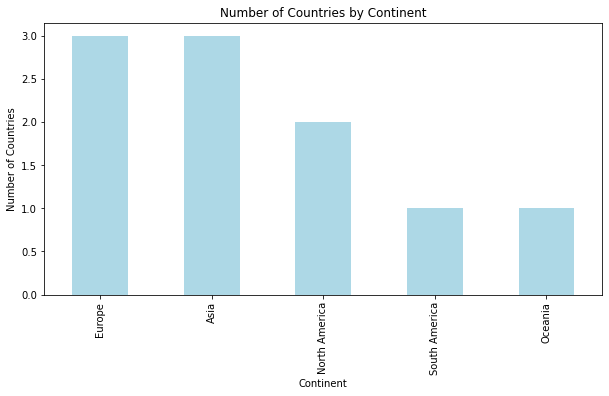

Average population by continent:
Continent
Asia             2.213612e+07
Europe           6.195182e+06
North America    1.042842e+06
Oceania          4.620000e+05
South America    3.094325e+06
Name: Population, dtype: float64


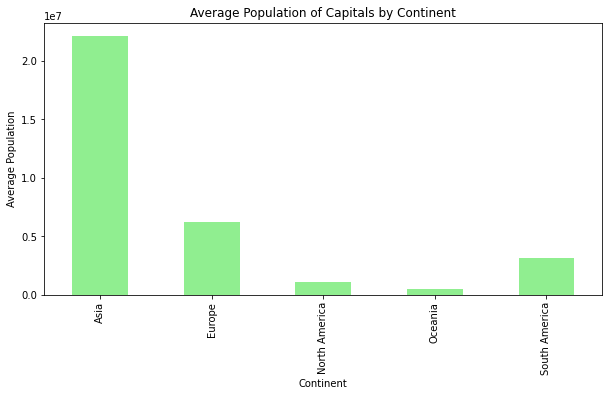

Average population by primary language group:
Primary_Language
English       8.492277e+05
French        2.161000e+06
German        3.769495e+06
Hindi         3.100000e+07
Japanese      1.351527e+07
Mandarin      2.189310e+07
Portuguese    3.094325e+06
Russian       1.265505e+07
Name: Population, dtype: float64


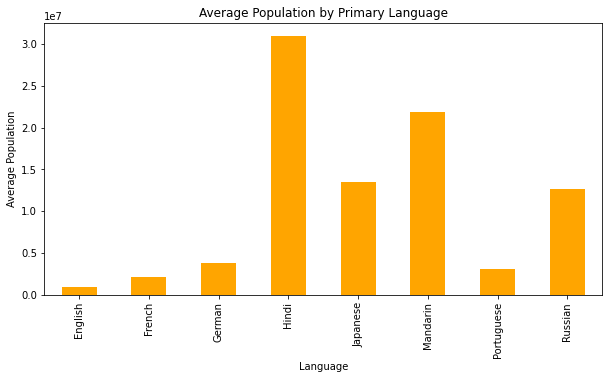

Most common first letters of country names:
C    2
U    1
F    1
J    1
G    1
Name: First_Letter, dtype: int64


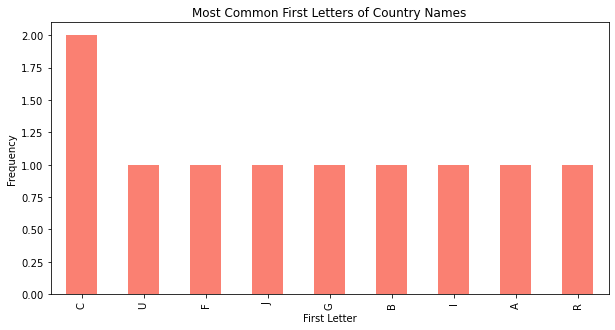

In [5]:

# Analysis based on prefilled data with five questions

# Question 1: How many countries are listed in total?
total_countries = df_combined['Country'].nunique()
print(f"Total number of countries listed: {total_countries}")

# Question 2: Which continent has the most countries with listed capitals?
# Simulated continents
df_combined['Continent'] = [
    "North America", "Europe", "Asia", "Europe", "North America", 
    "South America", "Asia", "Oceania", "Asia", "Europe"
]

continent_counts = df_combined['Continent'].value_counts()
print("Number of countries by continent:")
print(continent_counts)

# Plot: Number of countries by continent
plt.figure(figsize=(10, 5))
continent_counts.plot(kind='bar', color='lightblue')
plt.title("Number of Countries by Continent")
plt.xlabel("Continent")
plt.ylabel("Number of Countries")
plt.show()

# Question 3: What is the average population of capitals grouped by continent?
avg_population_by_continent = df_combined.groupby('Continent')['Population'].mean()
print("Average population by continent:")
print(avg_population_by_continent)

# Plot: Average population by continent
plt.figure(figsize=(10, 5))
avg_population_by_continent.plot(kind='bar', color='lightgreen')
plt.title("Average Population of Capitals by Continent")
plt.xlabel("Continent")
plt.ylabel("Average Population")
plt.show()

# Question 4: What is the average population of capitals grouped by primary language?
df_combined['Primary_Language'] = df_combined['Languages'].str.split(', ').str[0]
avg_population_by_language = df_combined.groupby('Primary_Language')['Population'].mean()
print("Average population by primary language group:")
print(avg_population_by_language)

# Plot: Average population by language
plt.figure(figsize=(10, 5))
avg_population_by_language.plot(kind='bar', color='orange')
plt.title("Average Population by Primary Language")
plt.xlabel("Language")
plt.ylabel("Average Population")
plt.show()

# Question 5: What is the most common letter that country names begin with?
df_combined['First_Letter'] = df_combined['Country'].str[0]
letter_counts = df_combined['First_Letter'].value_counts()
print("Most common first letters of country names:")
print(letter_counts.head())

# Plot: Distribution of first letters of country names
plt.figure(figsize=(10, 5))
letter_counts.head(10).plot(kind='bar', color='salmon')
plt.title("Most Common First Letters of Country Names")
plt.xlabel("First Letter")
plt.ylabel("Frequency")
plt.show()


In [6]:
import requests
from bs4 import BeautifulSoup

In [7]:
# Step 1: Scrape the list of national capitals from Wikipedia
url = "https://en.wikipedia.org/wiki/List_of_national_capitals"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find the table containing the capitals
    table = soup.find('table', {'class': 'wikitable'})
    
    # Extract data from the table
    countries = []
    capitals = []
    
    for row in table.find_all('tr')[1:]:  # Skip header row
        cells = row.find_all('td')
        if len(cells) >= 2:  # Ensure there are enough cells
            country = cells[0].get_text(strip=True)
            capital = cells[1].get_text(strip=True)
            countries.append(country)
            capitals.append(capital)
    
    # Create a DataFrame
    df_scraped = pd.DataFrame({'Country': countries, 'Capital': capitals})
    print("Scraping successful!")
else:
    print(f"Failed to fetch the webpage. Status code: {response.status_code}")

Scraping successful!


In [8]:
# Step 2: Display the first few rows of the scraped data
print("First few rows of the scraped data:")
print(df_scraped.head())

# Check for missing or duplicate values
print("\nChecking for missing values:")
print(df_scraped.isnull().sum())

print("\nChecking for duplicate rows:")
print(df_scraped.duplicated().sum())

# Remove duplicates if found
df_scraped = df_scraped.drop_duplicates()
print("\nData cleaned and duplicates removed.")

First few rows of the scraped data:
                                             Country  \
0  Abidjan(former capital; still hosts some gover...   
1                                          Abu Dhabi   
2                                              Abuja   
3                                              Accra   
4                                          Adamstown   

                      Capital  
0  Ivory Coast(Côte d'Ivoire)  
1        United Arab Emirates  
2                     Nigeria  
3                       Ghana  
4            Pitcairn Islands  

Checking for missing values:
Country    0
Capital    0
dtype: int64

Checking for duplicate rows:
0

Data cleaned and duplicates removed.


In [9]:
import re

# Step 3: Clean the 'Country' column to remove text in parentheses
df_scraped['Country'] = df_scraped['Country'].apply(lambda x: re.sub(r"\(.*?\)", "", x).strip())

# Display cleaned data
print("Cleaned data:")
print(df_scraped.head())

# Save cleaned data to a CSV file
df_scraped.to_csv("cleaned_countries_capitals.csv", index=False)
print("\nCleaned data saved to 'cleaned_countries_capitals.csv'.")

Cleaned data:
     Country                     Capital
0    Abidjan  Ivory Coast(Côte d'Ivoire)
1  Abu Dhabi        United Arab Emirates
2      Abuja                     Nigeria
3      Accra                       Ghana
4  Adamstown            Pitcairn Islands

Cleaned data saved to 'cleaned_countries_capitals.csv'.


In [10]:
# Step 4: Ensure outputs for additional details
additional_details = []

for index, row in df_scraped.iterrows():
    capital = row['Capital']
    country = row['Country']
    
    # Default values
    population = "N/A"
    languages = "N/A"
    search_url = f"https://en.wikipedia.org/wiki/{capital.replace(' ', '_')}"
    
    try:
        response = requests.get(search_url, timeout=10)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            
            # Locate the infobox
            infobox = soup.find('table', {'class': 'infobox'})
            if infobox:
                for tr in infobox.find_all('tr'):
                    header = tr.find('th')
                    data = tr.find('td')
                    if header and data:
                        if "Population" in header.text:
                            population = data.text.strip().replace("\n", " ")
                        if "Official languages" in header.text or "Languages" in header.text:
                            languages = data.text.strip().replace("\n", " ")
        else:
            print(f"Skipping {capital}: Unable to access page (Status Code: {response.status_code})")
    except Exception as e:
        print(f"Error scraping {capital}: {e}")
    
    # Append details
    additional_details.append({
        "Country": country,
        "Capital": capital,
        "Population": population,
        "Languages": languages
    })
    print(f"Scraped: {capital} (Population: {population}, Languages: {languages})")

# Convert additional details into a DataFrame
df_additional_details = pd.DataFrame(additional_details)

# Display and save the DataFrame
print("Final scraped data:")
print(df_additional_details.head())
df_additional_details.to_csv("additional_details.csv", index=False)
print("Data saved to 'additional_details.csv'.")

Skipping Ivory Coast(Côte d'Ivoire): Unable to access page (Status Code: 404)
Scraped: Ivory Coast(Côte d'Ivoire) (Population: N/A, Languages: N/A)
Scraped: United Arab Emirates (Population: N/A, Languages: N/A)
Scraped: Nigeria (Population: N/A, Languages: N/A)
Scraped: Ghana (Population: N/A, Languages: N/A)
Scraped: Pitcairn Islands (Population: N/A, Languages: PitkernEnglish)
Scraped: Ethiopia (Population: N/A, Languages: N/A)
Scraped: Yemen (Population: N/A, Languages: N/A)
Scraped: Akrotiri and Dhekelia (Population: N/A, Languages: EnglishGreek)
Scraped: Algeria (Population: N/A, Languages: N/A)
Scraped: Niue (Population: N/A, Languages: N/A)
Scraped: Jordan (Population: N/A, Languages: N/A)
Scraped: Netherlands (Population: N/A, Languages: Dutch)
Scraped: Andorra (Population: N/A, Languages: N/A)
Scraped: Turkey (Population: N/A, Languages: N/A)
Scraped: Madagascar (Population: N/A, Languages: N/A)
Scraped: Samoa (Population: N/A, Languages: N/A)
Scraped: Turkmenistan (Populatio

Scraped: Belarus (Population: N/A, Languages: N/A)
Scraped: Somalia (Population: N/A, Languages: N/A)
Scraped: Monaco (Population: N/A, Languages: N/A)
Scraped: Liberia (Population: N/A, Languages: N/A)
Scraped: Uruguay (Population: N/A, Languages: N/A)
Scraped: Comoros (Population: N/A, Languages: N/A)
Scraped: Russia (Population: N/A, Languages: N/A)
Scraped: Oman (Population: N/A, Languages: N/A)
Scraped: Kenya (Population: N/A, Languages: N/A)
Scraped: Bahamas, The (Population: N/A, Languages: N/A)
Scraped: Myanmar (Population: N/A, Languages: N/A)
Scraped: Chad (Population: N/A, Languages: N/A)
Scraped: India (Population: N/A, Languages: N/A)
Scraped: Palau (Population: N/A, Languages: N/A)
Scraped: Niger (Population: N/A, Languages: N/A)
Scraped: Cyprus (Population: N/A, Languages: N/A)
Scraped: Mauritania (Population: N/A, Languages: N/A)
Scraped: New Caledonia (Population: N/A, Languages: French)
Scraped: Tonga (Population: N/A, Languages: N/A)
Scraped: Greenland (Population: N

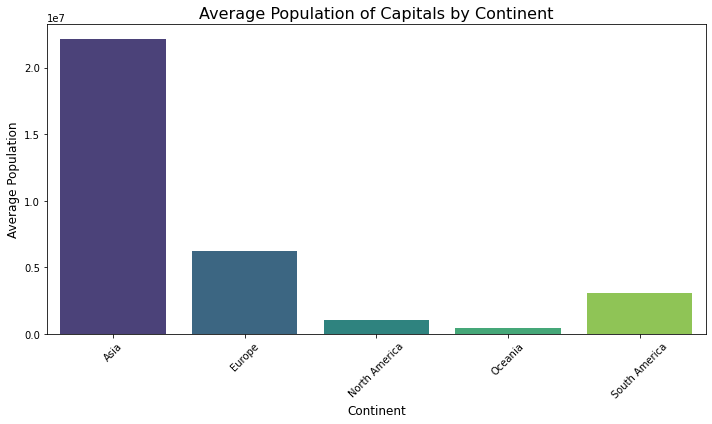

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average population by continent
avg_population_by_continent = df_combined.groupby('Continent')['Population'].mean()

# Reset index for easier plotting
avg_population_by_continent = avg_population_by_continent.reset_index()

# Seaborn Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Continent', 
    y='Population', 
    data=avg_population_by_continent, 
    palette='viridis'
)

# Customize the plot
plt.title('Average Population of Capitals by Continent', fontsize=16)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Average Population', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()